In [ ]:
!pip install -U xgboost

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

In [2]:
bookings = pd.read_csv('hotel_bookings_clean.csv')
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [3]:
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


It looks like we have 52 columns with 119,210 rows. All the datatypes are numeric and ready for use.

In [3]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

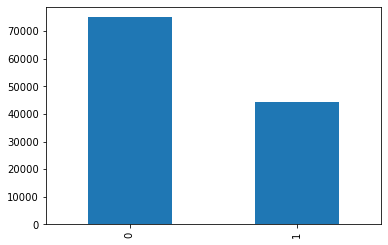

In [4]:
bookings['is_canceled'].value_counts().plot(kind='bar')

In [5]:
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()*100

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

In [6]:
bookings.corr()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,...,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,...,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,...,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,...,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,...,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,...,0.036697,0.012479,-0.005421,0.113828,-0.114571,0.001789,0.102708,-0.007566,0.020028,-0.065740
stays_in_week_nights,0.025542,0.166892,0.016047,-0.028362,0.019739,0.494175,1.000000,0.096214,0.044651,0.020373,...,0.041310,0.016107,-0.005607,0.079174,-0.080321,0.006857,0.134339,-0.016898,0.007839,-0.065311
adults,0.058182,0.117575,0.026567,-0.001754,0.029239,0.094759,0.096214,1.000000,0.029416,0.017890,...,0.051264,0.105558,0.003792,0.030537,-0.031030,0.003091,0.020339,0.060427,0.091906,-0.116878
children,0.004862,-0.037886,0.005559,0.014541,0.005483,0.046134,0.044651,0.029416,1.000000,0.023999,...,0.392982,0.156345,-0.001851,0.097132,-0.096833,-0.006769,-0.018143,-0.006600,0.096220,-0.092929
babies,-0.032569,-0.021003,0.010417,-0.000235,0.010193,0.018607,0.020373,0.017890,0.023999,1.000000,...,0.031676,0.005121,-0.000579,0.030677,-0.030484,-0.003012,-0.000197,0.000535,0.021613,-0.022945


In [5]:
bookings['deposit_type_Non_Refund'].value_counts()

0    104623
1     14587
Name: deposit_type_Non_Refund, dtype: int64

In [7]:
bookings.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_Non_Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA_TO        0.176005
hotel_City                        0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

In [8]:
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)
xgb_clf = xgb.XGBClassifier(random_state=123)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
xgb_clf.set_params(n_estimators=10)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)

In [11]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.8145907473309608


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

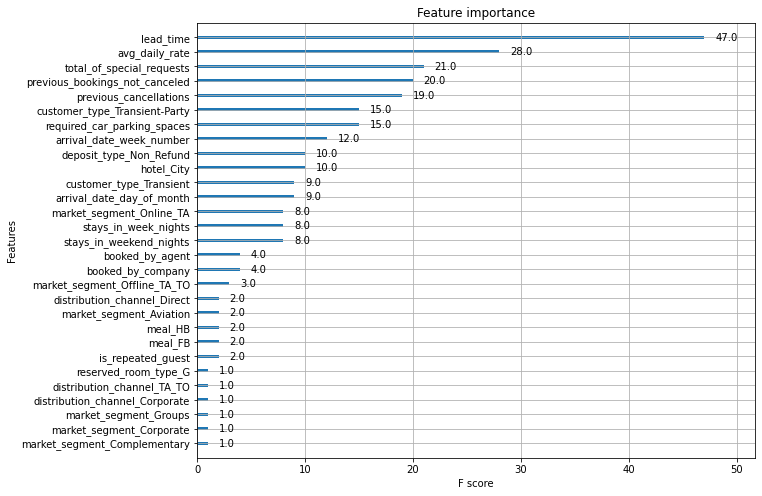

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)
xgb.plot_importance(xgb_clf)

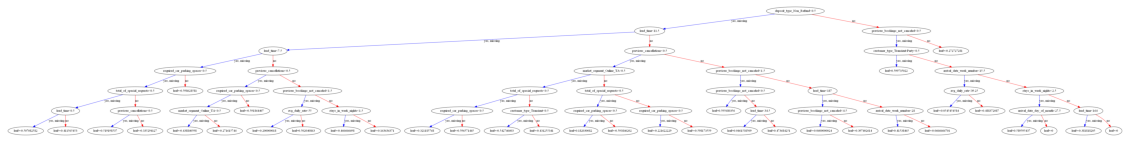

In [15]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20)
xgb.plot_tree(xgb_clf, num_trees=0);

In [16]:
bookings_dmatrix = xgb.DMatrix(data=X,label=y)

In [19]:
params = {"objective":"binary:logistic", 'max_depth': 3}
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10, seed=123, metrics=['error'])
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238533,0.006855,0.239460,0.009837
1,0.232766,0.001537,0.232942,0.000840
2,0.232850,0.001445,0.233001,0.000868
3,0.233126,0.001120,0.233194,0.001102
4,0.232812,0.000861,0.232866,0.001432
5,0.220007,0.018839,0.219394,0.017942
6,0.193465,0.000814,0.193541,0.002012
7,0.193394,0.000787,0.193591,0.001621
8,0.192970,0.000645,0.193096,0.002312
9,0.192035,0.000728,0.192081,0.001525


In [20]:
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]
print("baseline cv accuracy:", accuracy)

baseline cv accuracy: 0.8079188001388304


In [21]:
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=10, seed=123, metrics=['error'])

accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]
print("accuracy:", accuracy)

accuracy: 0.8146967578944505


In [22]:
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.238533,0.006855,0.239460,0.009837
1,0.232766,0.001537,0.232942,0.000840
2,0.232850,0.001445,0.233001,0.000868
3,0.233126,0.001120,0.233194,0.001102
4,0.232812,0.000861,0.232866,0.001432
5,0.220007,0.018839,0.219394,0.017942
6,0.193465,0.000814,0.193541,0.002012
7,0.193394,0.000787,0.193591,0.001621
8,0.192970,0.000645,0.193096,0.002312
9,0.192035,0.000728,0.192081,0.001525


In [23]:
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

In [24]:
xgb_clf.set_params(max_depth=10)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8367310625317743

In [25]:
xgb_clf.set_params(colsample_bytree=0.5)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8374682257244535

In [26]:
xgb_clf.set_params(subsample=0.75)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8365022877478393

In [27]:
xgb_clf.set_params(gamma=0.25)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8362735129639044

In [28]:
xgb_clf.set_params(learning_rate=0.3)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8362735129639044

In [29]:
xgb_clf.set_params(reg_alpha=0.01)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.8365277071682765

In [30]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.25,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

rs_param_grid = {
    'max_depth': list((range(3,12))),
    'alpha': [0,0.001, 0.01,0.1,1],
    'subsample': [0.5,0.75,1],
    'learning_rate': np.linspace(0.01,0.5, 10),
    'n_estimators': [10, 25, 40]
    }

xgb_clf = xgb.XGBClassifier(random_state=123)
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)
xgb_rs.fit(X_train, y_train)
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.3s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.3s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   1.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   1.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   1.0s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   1.5s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   1.6s
[CV] END

In [ ]:
# MasoudKaviani.ir
# Data: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand